                                           ABOUT THE DATASET

The dataset we’ve consisted of records of Top 250 movies rating by IMDB. I was able to webscrap the necessary informations and import them into an excel for prediction using the Clustering algorithm

In [270]:
##IMPORT NECESSARY LIBARIES 
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
%matplotlib inline
from bs4 import BeautifulSoup
import requests
from csv import writer

In [154]:
## GETTING THE URL OF THE WEBSITE 

source = requests.get("https://www.imdb.com/chart/top/")

In [14]:
### WE USE RAISE_FOR_STATUS IN CASE THE WEBISTE IS NOT REACHABLE AT A POINT 

source.raise_for_status()

In [155]:
### PASER IS USE TO ACCESS THE HTML PAGE OF THE SITE

soup = BeautifulSoup(source.text,'html.parser')

In [18]:
###GETTING THE TAG OF THE HTML
#### FIND_ALL() IS USED TO GET ALL THE NAMES IN THE TAG
movies = soup.find('tbody', class_="lister-list").find_all('tr')
print(len(movies))

250


In [272]:

for movie in movies:
    Movie_name = movie.find('td', class_="titleColumn").a.text    ###EXTRACTING THE NAME OF THE MOVIE FROM THE HTML
    Movie_rank = movie.find('td', class_="titleColumn").get_text(strip=True).split('.')[0]  ###EXTRACTING THE RANK
    Movie_rating = movie.find('td', class_="ratingColumn").get_text(strip=True)  ##EXTRACTING THE RATING
    Movie_year = movie.find('td', class_="titleColumn").span.text.strip('()')   ###EXTRACTING THE YEAR 

    print(Movie_rank, Movie_name, Movie_year, Movie_rating)
    break

1 The Shawshank Redemption 1994 9.2


LOADING THE FILE INTO EXCEL

In [115]:
import openpyxl

In [131]:
excel = openpyxl.Workbook()
sheet = excel.active
sheet.title = 'IMDb Top 250 Movies'
print(excel.sheetnames)
sheet.append(["Movie Rank", "Movie Title", "Movie Year", " IMDBRating"]) ###CREATING HEADINGS FOR THE COLUMN NAMES

for movie in movies:
    Movie_name = movie.find('td', class_="titleColumn").a.text    ###EXTRACTING THE NAME OF THE MOVIE FROM THE HTML
    Movie_rank = movie.find('td', class_="titleColumn").get_text(strip=True).split('.')[0]  ###EXTRACTING THE RANK
    Movie_rating = movie.find('td', class_="ratingColumn").get_text(strip=True)  ##EXTRACTING THE RATING
    Movie_year = movie.find('td', class_="titleColumn").span.text.strip('()')   ###EXTRACTING THE YEAR 
    
    
    
    sheet.append([Movie_rank, Movie_name, Movie_year, Movie_rating])
excel.save("IMDb Top 250 Movies.xlsx")  ####SAVING THE EXCEL FILE TO THE LOCAL DIRECTORY

['IMDb Top 250 Movies']
1 The Shawshank Redemption 1994 9.2
2 The Godfather 1972 9.2
3 The Dark Knight 2008 9.0
4 The Godfather Part II 1974 9.0
5 12 Angry Men 1957 9.0
6 Schindler's List 1993 8.9
7 The Lord of the Rings: The Return of the King 2003 8.9
8 Pulp Fiction 1994 8.8
9 The Lord of the Rings: The Fellowship of the Ring 2001 8.8
10 Il buono, il brutto, il cattivo 1966 8.8
11 Forrest Gump 1994 8.8
12 Fight Club 1999 8.7
13 The Lord of the Rings: The Two Towers 2002 8.7
14 Inception 2010 8.7
15 The Empire Strikes Back 1980 8.7
16 The Matrix 1999 8.7
17 Goodfellas 1990 8.7
18 One Flew Over the Cuckoo's Nest 1975 8.6
19 Se7en 1995 8.6
20 Shichinin no samurai 1954 8.6
21 It's a Wonderful Life 1946 8.6
22 The Silence of the Lambs 1991 8.6
23 Cidade de Deus 2002 8.6
24 Saving Private Ryan 1998 8.6
25 La vita è bella 1997 8.6
26 Interstellar 2014 8.6
27 The Green Mile 1999 8.6
28 Star Wars 1977 8.6
29 Terminator 2: Judgment Day 1991 8.5
30 Back to the Future 1985 8.5
31 Sen to Chihiro 

In [161]:
###IMPORTING THE DATASET FROM DIRECTORY
dataset = pd.read_excel('C:/data/IMDb Top 250 Movies.xlsx')

In [167]:
print(dataset.shape)
dataset.head()

(250, 4)


,Movie Rank,Movie Title,Movie Year,IMDBRating
0,1,The Shawshank Redemption,1994,9.2
1,2,The Godfather,1972,9.2
2,3,The Dark Knight,2008,9.0
3,4,The Godfather Part II,1974,9.0
4,5,12 Angry Men,1957,9.0


In [168]:
dataset.isna().sum()

Movie Rank     0
Movie Title    0
Movie Year     0
 IMDBRating    0
dtype: int64

In [169]:
dataset.dtypes

Movie Rank       int64
Movie Title     object
Movie Year       int64
 IMDBRating    float64
dtype: object

In [232]:
features = ['Movie Rank','Movie Year', ' IMDBRating']

C:\Users\HP\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


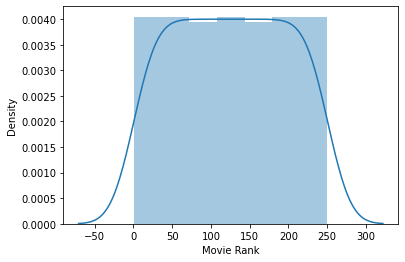

C:\Users\HP\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


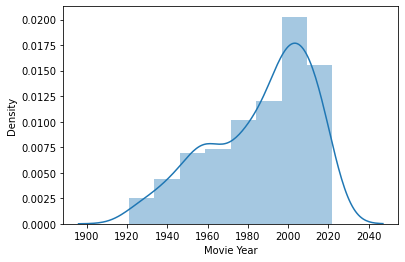

C:\Users\HP\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


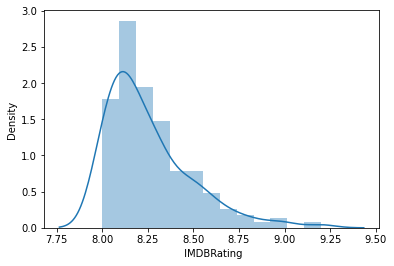

In [203]:
#Checking the distributions of the interactions

for feature in features:
    sns.distplot(dataset[feature]) 
    plt.show()

In [186]:
print(dataset['Movie Year'].value_counts())

1995    8
2004    7
2009    6
1957    6
2003    6
       ..
1941    1
1936    1
1972    1
1964    1
1934    1
Name: Movie Year, Length: 86, dtype: int64


In [204]:
print(dataset[' IMDBRating'].value_counts())

8.1    66
8.2    45
8.0    41
8.3    34
8.5    18
8.4    18
8.6    11
8.7     6
8.8     4
9.0     3
9.2     2
8.9     2
Name:  IMDBRating, dtype: int64


In [184]:
##Correlation analysis in research is a statistical method used to measure the strength of the linear relationship between two variables and compute their association.


correlation = dataset.corr().transpose()
correlation

,Movie Rank,Movie Year,IMDBRating
Movie Rank,1.000000,-0.047245,-0.902919
Movie Year,-0.047245,1.000000,0.040697
IMDBRating,-0.902919,0.040697,1.000000


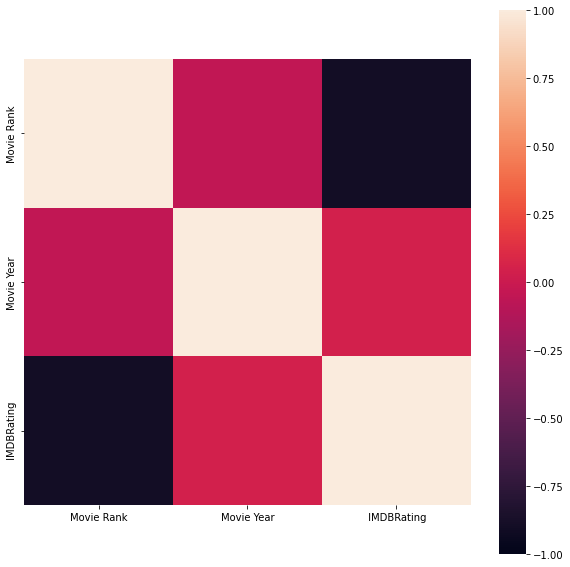

In [185]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,vmax=1,vmin=-1,square=True)
plt.show()

In [201]:
###SEGREGATE AND ZIPPING DATASET
IMDBRating = dataset[' IMDBRating'].values
Movie_Year = dataset['Movie Year'].values
x = np.array(list(zip(IMDBRating, Movie_Year)))
x

array([[   9.2, 1994. ],
       [   9.2, 1972. ],
       [   9. , 2008. ],
       [   9. , 1974. ],
       [   9. , 1957. ],
       [   8.9, 1993. ],
       [   8.9, 2003. ],
       [   8.8, 1994. ],
       [   8.8, 2001. ],
       [   8.8, 1966. ],
       [   8.8, 1994. ],
       [   8.7, 1999. ],
       [   8.7, 2002. ],
       [   8.7, 2010. ],
       [   8.7, 1980. ],
       [   8.7, 1999. ],
       [   8.7, 1990. ],
       [   8.6, 1975. ],
       [   8.6, 1995. ],
       [   8.6, 1954. ],
       [   8.6, 1946. ],
       [   8.6, 1991. ],
       [   8.6, 2002. ],
       [   8.6, 1998. ],
       [   8.6, 1997. ],
       [   8.6, 2014. ],
       [   8.6, 1999. ],
       [   8.6, 1977. ],
       [   8.5, 1991. ],
       [   8.5, 1985. ],
       [   8.5, 2001. ],
       [   8.5, 1960. ],
       [   8.5, 2002. ],
       [   8.5, 2019. ],
       [   8.5, 1994. ],
       [   8.5, 1994. ],
       [   8.5, 2000. ],
       [   8.5, 1998. ],
       [   8.5, 2006. ],
       [   8.5, 1995. ],


In [205]:
x.shape

(250, 2)

In [206]:
###Let us now fit k-means algorithm on our scaled data and find out the optimum number of clusters to use

from sklearn.cluster import KMeans

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: 

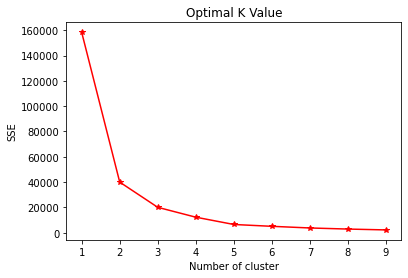

In [209]:
###FINDING THE OPTIMIZED K VALUE

sse = {} 
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=1).fit(x)
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), color='r', marker='*')
plt.title('Optimal K Value')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [218]:
####MAKING PREDICTION USING KMEANS 
model=KMeans(n_clusters=2, random_state=42)
y_means = model.fit_predict(x)

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


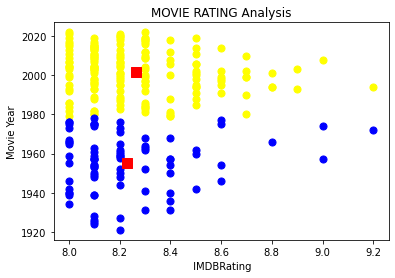

In [219]:
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=50, c='yellow',label='1')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=50, c='blue',label='2')

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],s=100,marker='s', c='red')
plt.title('MOVIE RATING Analysis')
plt.xlabel(' IMDBRating')
plt.ylabel('Movie Year')
plt.show()

In [220]:
###Converting the cluster to data frame 
convert = pd.DataFrame(y_means,columns=['convert']) 
convert

,convert
0,0
1,1
2,0
3,1
4,1
...,...
245,1
246,0
247,0
248,0


# HIERARCHICAL CLUSTERING


In [237]:
dataset.head()

,Movie Rank,Movie Title,Movie Year,IMDBRating
0,1,The Shawshank Redemption,1994,9.2
1,2,The Godfather,1972,9.2
2,3,The Dark Knight,2008,9.0
3,4,The Godfather Part II,1974,9.0
4,5,12 Angry Men,1957,9.0


In [264]:
datamovie = dataset.iloc[1:,2:]

In [262]:
datamovie

,Movie Year,IMDBRating
0,1994,9.2
1,1972,9.2
2,2008,9.0
3,1974,9.0
4,1957,9.0
...,...,...
245,1975,8.0
246,1992,8.0
247,2011,8.0
248,1982,8.0


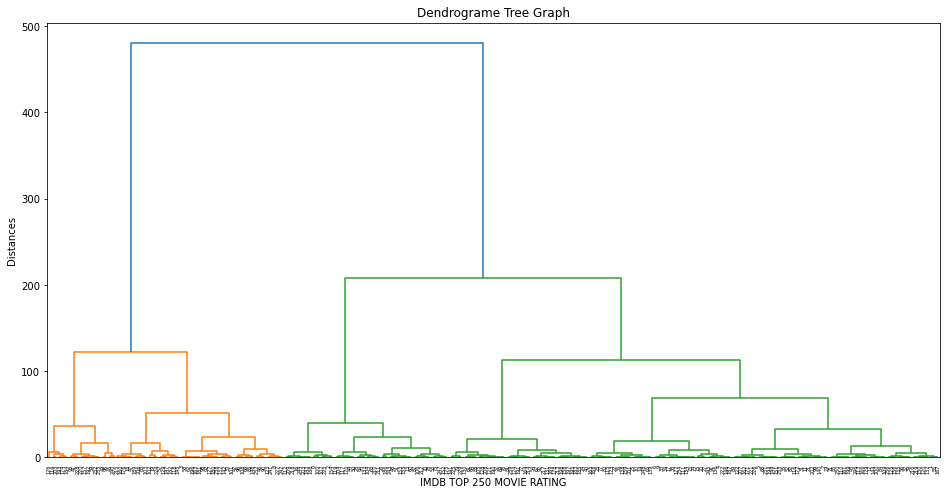

In [267]:
import scipy.cluster.hierarchy as clus

plt.figure(1, figsize=(16,8))
dendrogram = clus.dendrogram(clus.linkage(datamovie, method = "ward"))

plt.title("Dendrograme Tree Graph")
plt.xlabel('IMDB TOP 250 MOVIE RATING')
plt.ylabel('Distances')
plt.show()

In [269]:
####FITTING THE HIERARCHIAL CLUSTERING TO THE DATASET WITH N=2

from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'average')
y_means = model.fit_predict(datamovie)
y_means

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1], dtype=int64)

ANALYSIS BASED ON THE FINDINGS

1. WITH THE HELP OF CLUSTERING ALGORITHM WE WERE ABLE TO IDENTIFY THAT LEAST MOVIES WERE RELEASED BETWEEN THE YEAR OF 1920 -        1980 COMPARED TO 1980-2020

2. MOVIES BETWEEN 1980 - 2020 HAD HIGHER RATING COMPARED TO 1920 - 1980